In [ ]:
library(tidyverse)
library(naniar)
library(visdat)
library(ggplot2)
library(lubridate)
library(gridExtra)
library(GGally)
library(corrr)
library(dplyr)
library(car)
library(mgcv)
library(ggfortify)

In [118]:
data = read.csv('data/fatal-police-shootings-data.csv', na.strings=c("","NA"))

### Initial EDA

> DF shape, column names, data-type setting, dropping irrelevant features

In [119]:
dim(data)
names(data)

[1] 7291   17

[1] "id"                      "name"                   
 [3] "date"                    "manner_of_death"        
 [5] "armed"                   "age"                    
 [7] "gender"                  "race"                   
 [9] "city"                    "state"                  
[11] "signs_of_mental_illness" "threat_level"           
[13] "flee"                    "body_camera"            
[15] "longitude"               "latitude"               
[17] "is_geocoding_exact"

In [120]:
head(data)

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,longitude,latitude,is_geocoding_exact
,<int>,<fct>,<fct>,<fct>,<fct>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<fct>
1,3,Tim Elliot,2015-01-02,shot,gun,53,M,A,Shelton,WA,True,attack,Not fleeing,False,-123.122,47.247,True
2,4,Lewis Lee Lembke,2015-01-02,shot,gun,47,M,W,Aloha,OR,False,attack,Not fleeing,False,-122.892,45.487,True
3,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23,M,H,Wichita,KS,False,other,Not fleeing,False,-97.281,37.695,True
4,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32,M,W,San Francisco,CA,True,attack,Not fleeing,False,-122.422,37.763,True
5,9,Michael Rodriguez,2015-01-04,shot,nail gun,39,M,H,Evans,CO,False,attack,Not fleeing,False,-104.692,40.384,True
6,11,Kenneth Joe Brown,2015-01-04,shot,gun,18,M,W,Guthrie,OK,False,attack,Not fleeing,False,-97.423,35.877,True


In [121]:
# number of unique values
for (c in names(data)) { print(paste0(c, ": ", length(unique(data[[c]])))) }

[1] "id: 7291"
[1] "name: 6902"
[1] "date: 2485"
[1] "manner_of_death: 2"
[1] "armed: 101"
[1] "age: 81"
[1] "gender: 3"
[1] "race: 7"
[1] "city: 3032"
[1] "state: 51"
[1] "signs_of_mental_illness: 2"
[1] "threat_level: 3"
[1] "flee: 5"
[1] "body_camera: 2"
[1] "longitude: 5783"
[1] "latitude: 5138"
[1] "is_geocoding_exact: 2"


In [122]:
# Convert features to factor and numeric as appropriate

# CHECK: armed, city, date, longitude, latitude

features_to_drop = c("id", "name", "city")
factor_cols = c("manner_of_death", "armed", "gender", "race", "state", "signs_of_mental_illness", "threat_level", "flee", "body_camera")
numeric_cols = c("age")

In [123]:
data = data[,!(names(data) %in% features_to_drop)]
data <- data %>% 
    mutate(across(.cols=all_of(factor_cols), .fns = as.factor))
data <- data %>% 
    mutate(across(.cols=all_of(numeric_cols), .fns = as.numeric))

> Explore feature types, what info they contain

In [124]:
summary(data)

         date              manner_of_death          armed           age       
 2018-01-06:   9   shot            :6952   gun         :4159   Min.   : 6.00  
 2018-02-01:   9   shot and Tasered: 339   knife       :1051   1st Qu.:27.00  
 2018-04-01:   9                           unarmed     : 443   Median :35.00  
 2018-06-29:   9                           vehicle     : 264   Mean   :37.15  
 2019-01-28:   9                           undetermined: 262   3rd Qu.:45.00  
 2020-05-26:   9                           (Other)     : 903   Max.   :92.00  
 (Other)   :7237                           NA's        : 209   NA's   :421    
  gender       race          state      signs_of_mental_illness
 F   : 330   A   : 105   CA     :1063   False:5715             
 M   :6951   B   :1595   TX     : 642   True :1576             
 NA's:  10   H   :1089   FL     : 461                          
             N   :  91   AZ     : 334                          
             O   :  47   GA     : 272           

Run Univariate analysis of each feature

In [125]:
attach(data)

The following objects are masked from data (pos = 3):

    age, armed, body_camera, date, flee, gender, is_geocoding_exact,
    latitude, longitude, manner_of_death, race,
    signs_of_mental_illness, state, threat_level




[1] "manner_of_death: Unique Count: 2"
[1] ""
[1] "armed: Unique Count: 101"
                                Var1 Freq
1                    air conditioner    1
2                         air pistol    2
3                     Airsoft pistol    5
4                                 ax   24
5                           barstool    1
6                       baseball bat   20
7            baseball bat and bottle    1
8   baseball bat and fireplace poker    1
9             baseball bat and knife    1
10                             baton    6
11                            BB gun   17
12                BB gun and vehicle    1
13                      bean-bag gun    1
14                       beer bottle    3
15                        binoculars    1
16                      blunt object    5
17                            bottle    2
18                     bow and arrow    2
19                        box cutter   14
20                             brick    2
21               car, knife and mace    1

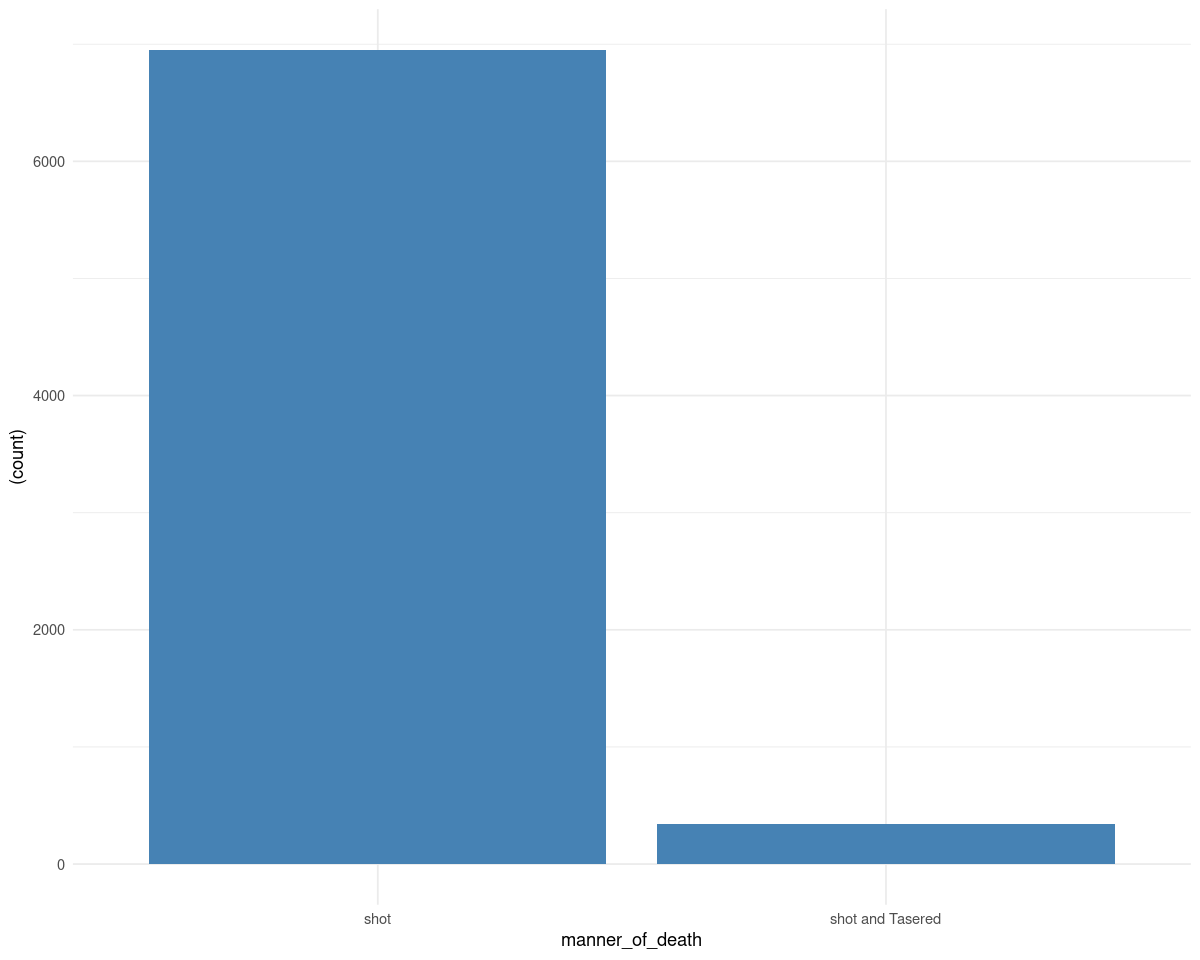

[1] ""
[1] "race: Unique Count: 7"


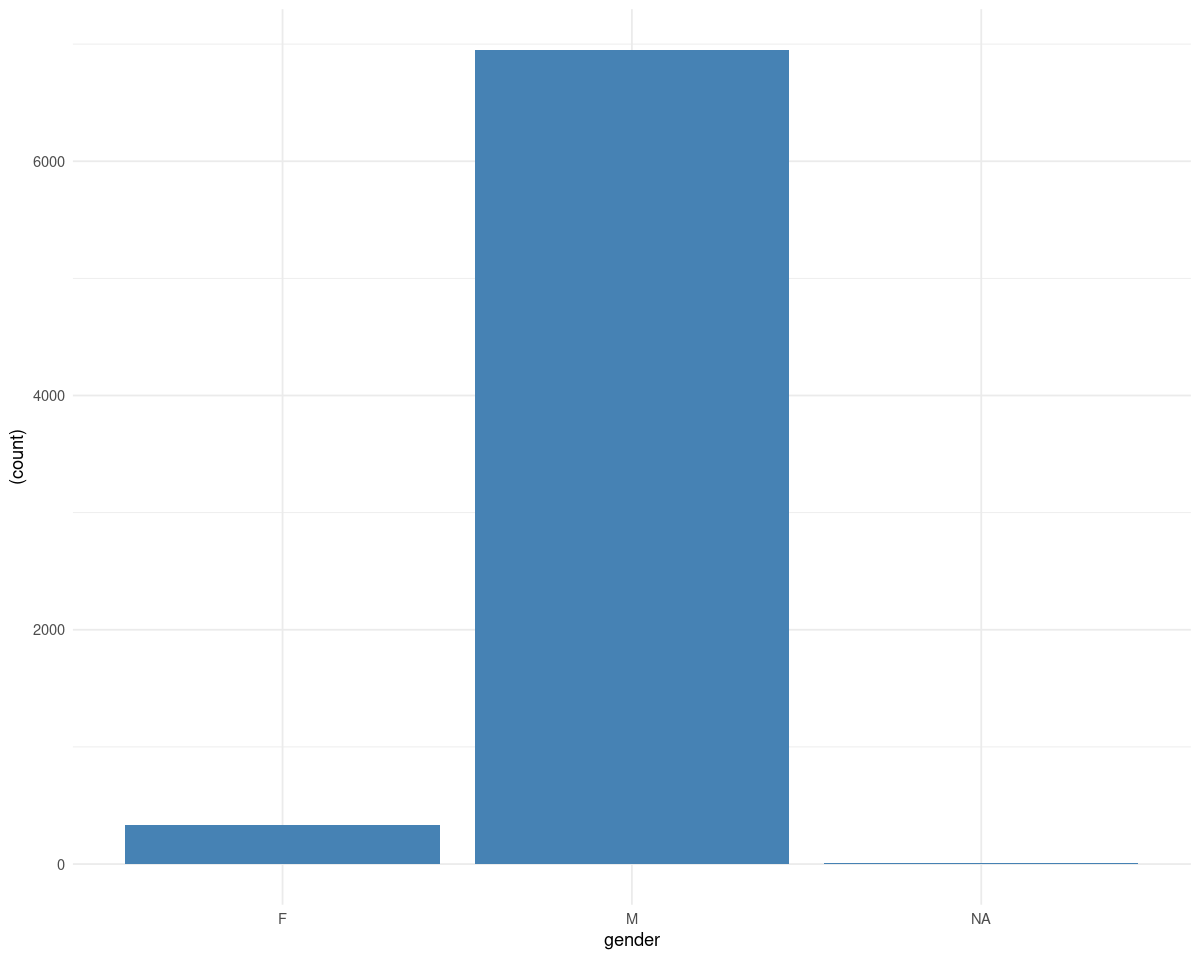

[1] ""
[1] "state: Unique Count: 51"
   Var1 Freq
1    AK   49
2    AL  138
3    AR  102
4    AZ  334
5    CA 1063
6    CO  262
7    CT   22
8    DC   22
9    DE   17
10   FL  461
11   GA  272
12   HI   37
13   IA   45
14   ID   61
15   IL  146
16   IN  137
17   KS   67
18   KY  133
19   LA  150
20   MA   53
21   MD  102
22   ME   30
23   MI  125
24   MN   81
25   MO  191
26   MS   94
27   MT   46
28   NC  204
29   ND   15
30   NE   37
31   NH   20
32   NJ   85
33   NM  156
34   NV  121
35   NY  133
36   OH  199
37   OK  205
38   OR  117
39   PA  150
40   RI    5
41   SC  115
42   SD   24
43   TN  203
44   TX  642
45   UT   85
46   VA  127
47   VT   11
48   WA  198
49   WI  111
50   WV   67
51   WY   21
[1] ""
[1] "signs_of_mental_illness: Unique Count: 2"


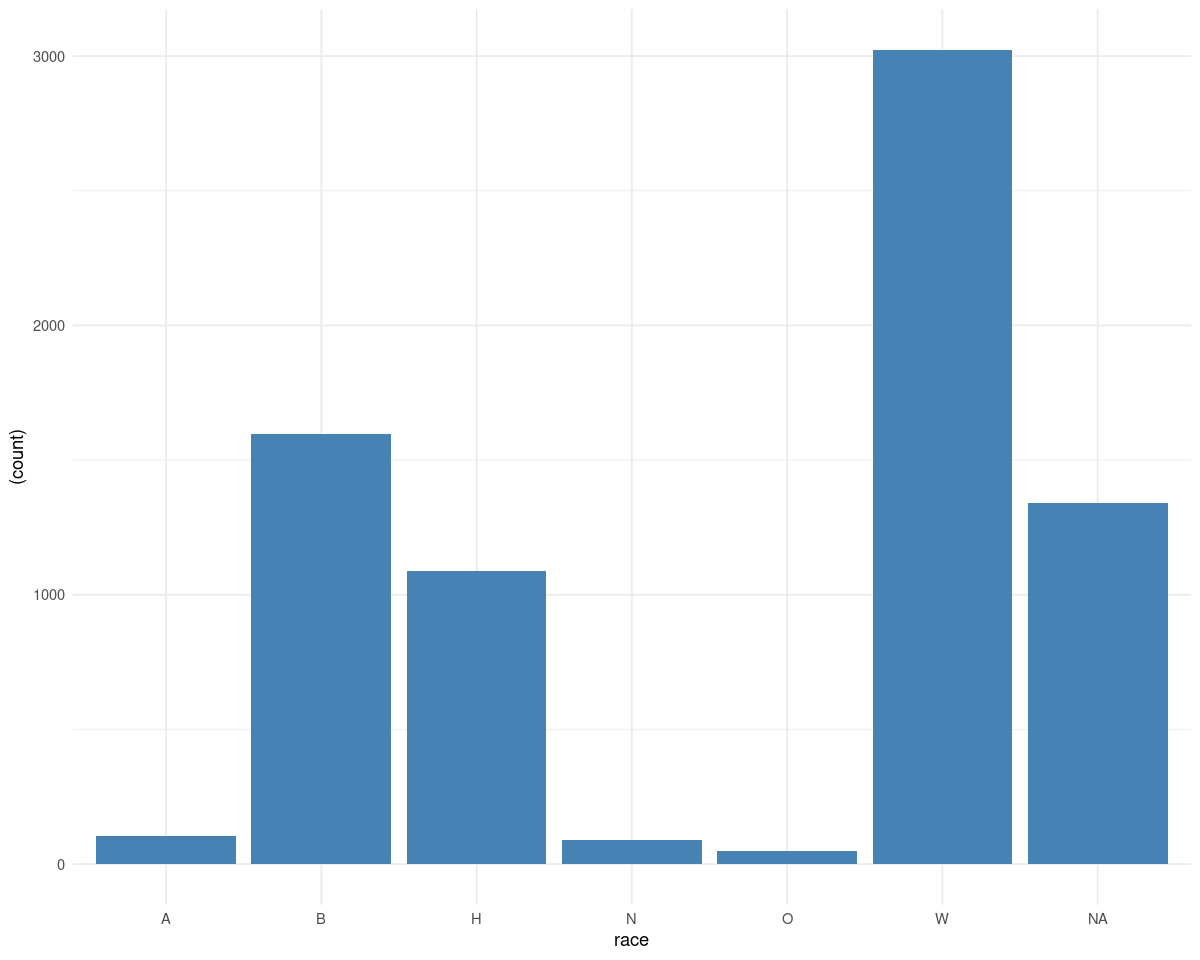

[1] ""
[1] "threat_level: Unique Count: 3"


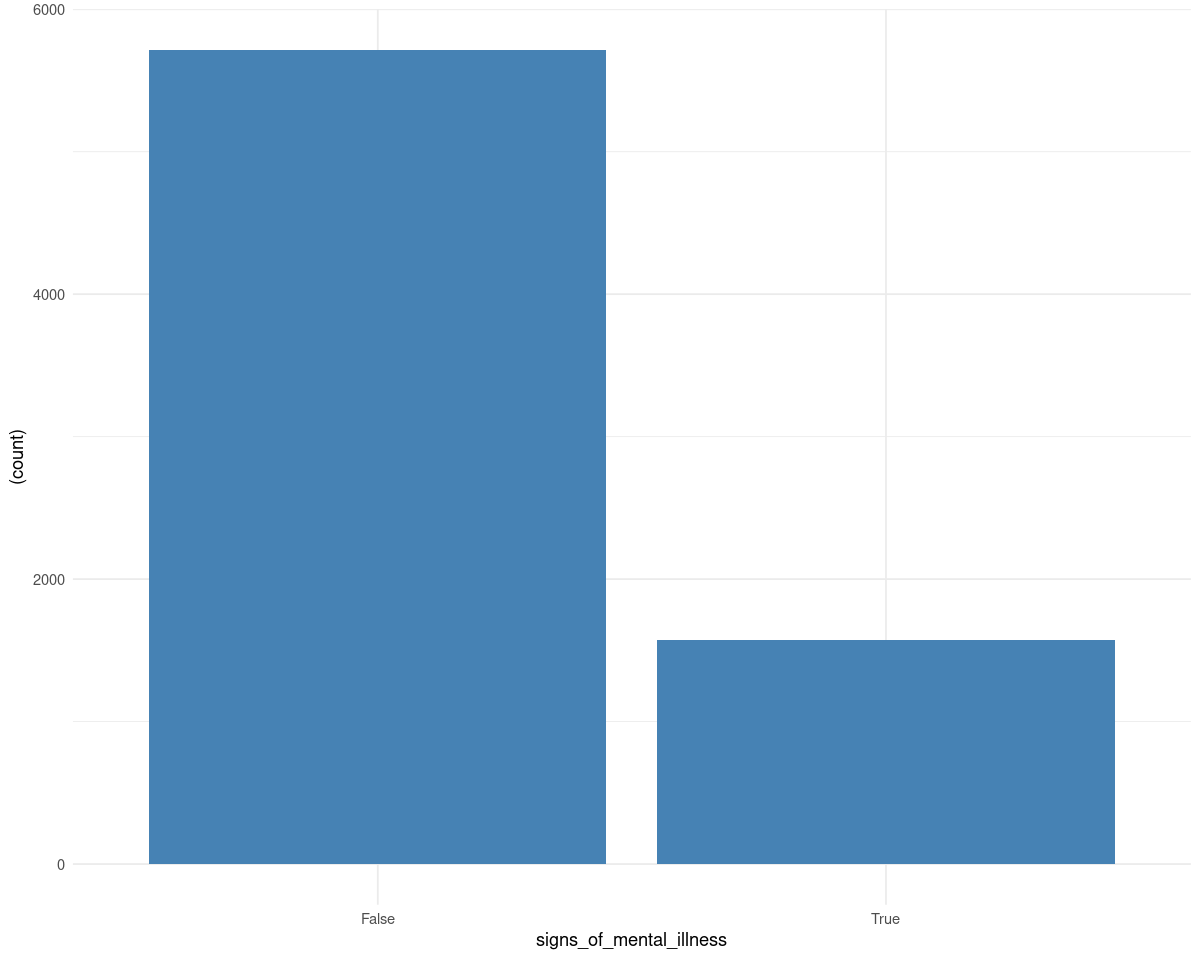

[1] ""
[1] "flee: Unique Count: 5"


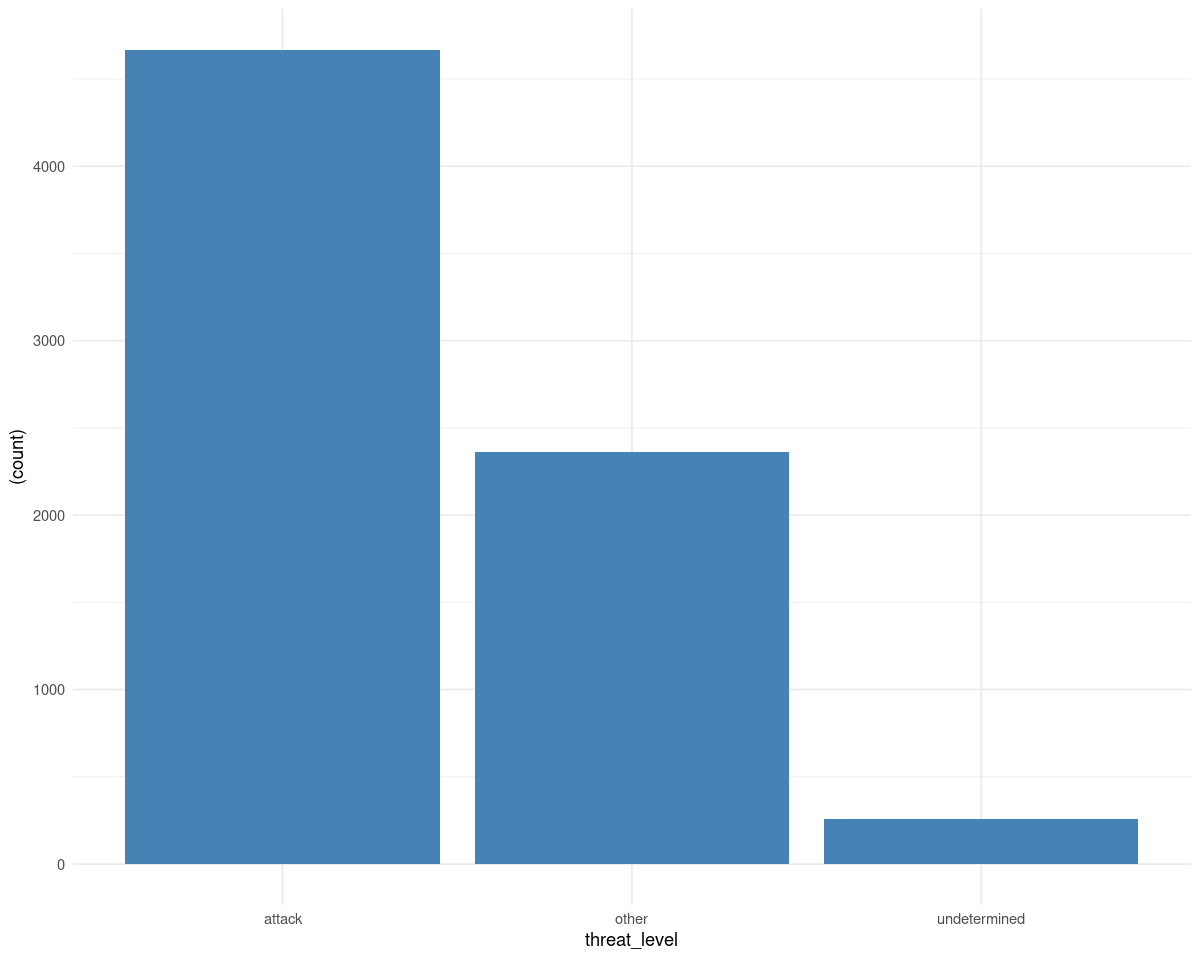

[1] ""
[1] "body_camera: Unique Count: 2"


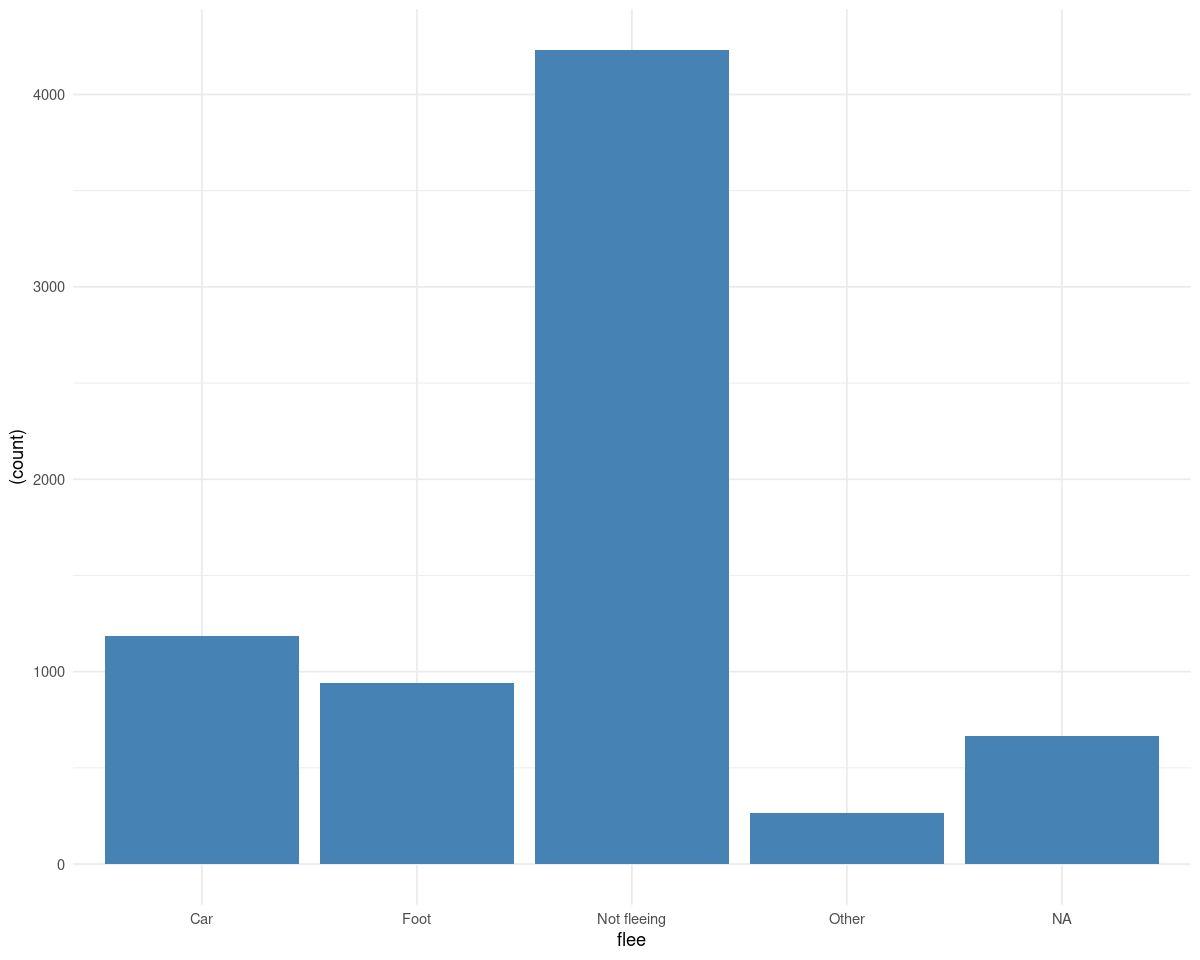

[1] ""


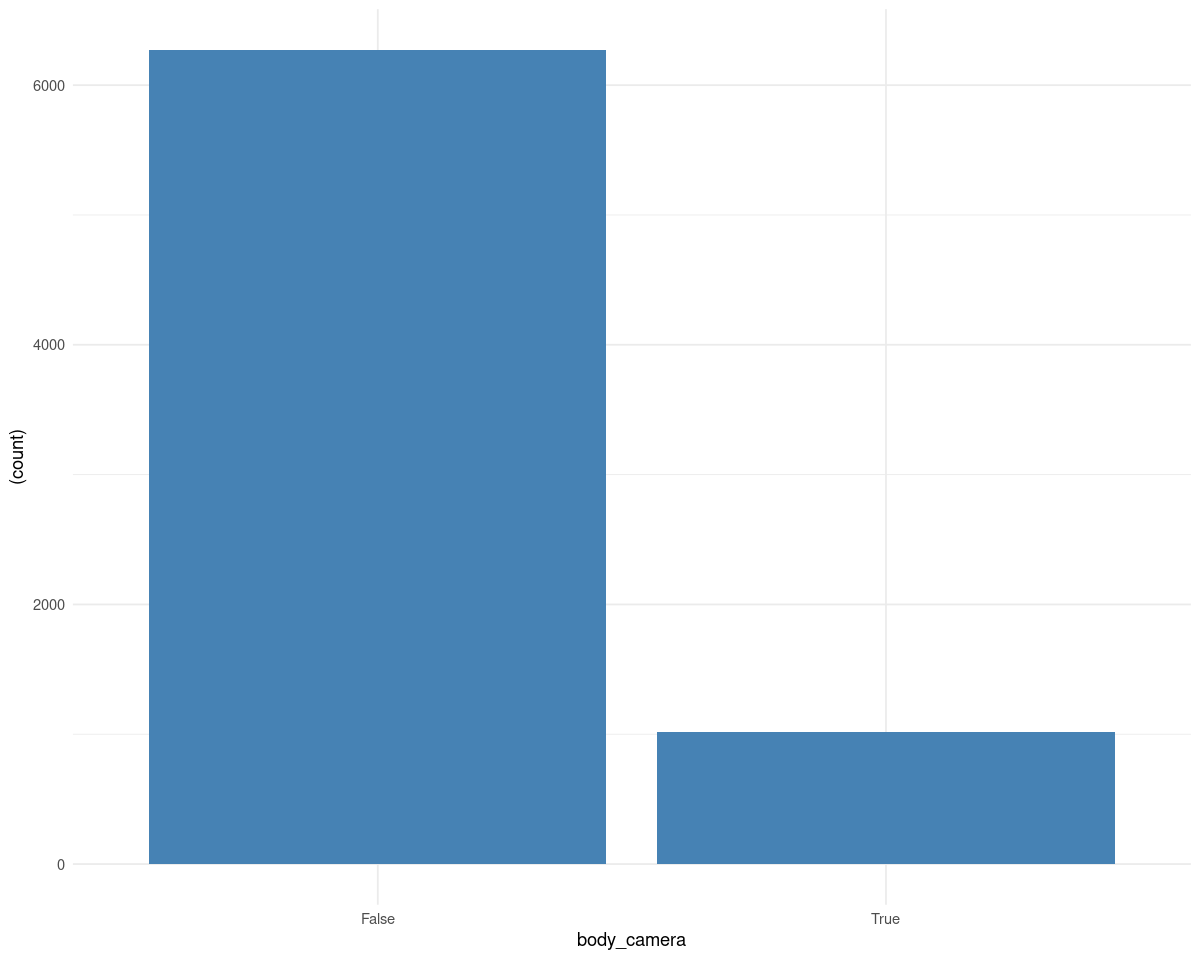

In [127]:
options(repr.plot.width=10, repr.plot.height=8)
for (c in factor_cols) {
    print(paste0(c, ": Unique Count: ", length(unique(data[[c]]))))
    if (length(unique(data[[c]])) < 10) {
        print(ggplot(data=data, aes(x=unlist(data[c]), y=(..count..))) + geom_bar(fill="steelblue") + theme_minimal() + xlab(c))
    } else {
        print(as.data.frame(table(data[c])))
    }
    print("")
}

In [128]:
# print(summary(data$armed))
unique(data$armed)

[1] gun                              unarmed                         
  [3] toy weapon                       nail gun                        
  [5] knife                            <NA>                            
  [7] shovel                           vehicle                         
  [9] hammer                           hatchet                         
 [11] sword                            machete                         
 [13] box cutter                       undetermined                    
 [15] metal object                     screwdriver                     
 [17] lawn mower blade                 flagpole                        
 [19] guns and explosives              cordless drill                  
 [21] crossbow                         BB gun                          
 [23] metal pole                       Taser                           
 [25] metal pipe                       metal hand tool                 
 [27] blunt object                     metal stick                     
 [29] sharp object                     meat cleaver                    
 [31] carjack                          chain                           
 [33] contractor's level               railroad spikes                 
 [35] stapler                          beer bottle                     
 [37] unknown weapon                   binoculars                      
 [39] bean-bag gun                     baseball bat and fireplace poker
 [41] straight edge razor              gun and knife                   
 [43] ax                               brick                           
 [45] baseball bat                     hand torch                      
 [47] chain saw                        garden tool                     
 [49] scissors                         pole                            
 [51] pick-axe                         flashlight                      
 [53] baton                            spear                           
 [55] chair                            pitchfork                       
 [57] hatchet and gun                  rock                            
 [59] piece of wood                    pipe                            
 [61] glass shard                      motorcycle                      
 [63] pepper spray                     metal rake                      
 [65] crowbar                          oar                             
 [67] machete and gun                  tire iron                       
 [69] air conditioner                  pole and knife                  
 [71] baseball bat and bottle          fireworks                       
 [73] pen                              chainsaw                        
 [75] gun and sword                    gun and car                     
 [77] pellet gun                       claimed to be armed             
 [79] incendiary device                samurai sword                   
 [81] bow and arrow                    gun and vehicle                 
 [83] vehicle and gun                  wrench                          
 [85] walking stick                    barstool                        
 [87] grenade                          BB gun and vehicle              
 [89] wasp spray                       air pistol                      
 [91] Airsoft pistol                   baseball bat and knife          
 [93] vehicle and machete              ice pick                        
 [95] car, knife and mace              bottle                          
 [97] gun and machete                  microphone                      
 [99] knife and vehicle                machete and hammer              
[101] stake                           
100 Levels: air conditioner air pistol Airsoft pistol ax ... wrench

Check bivariate vs response

Check GGPairs

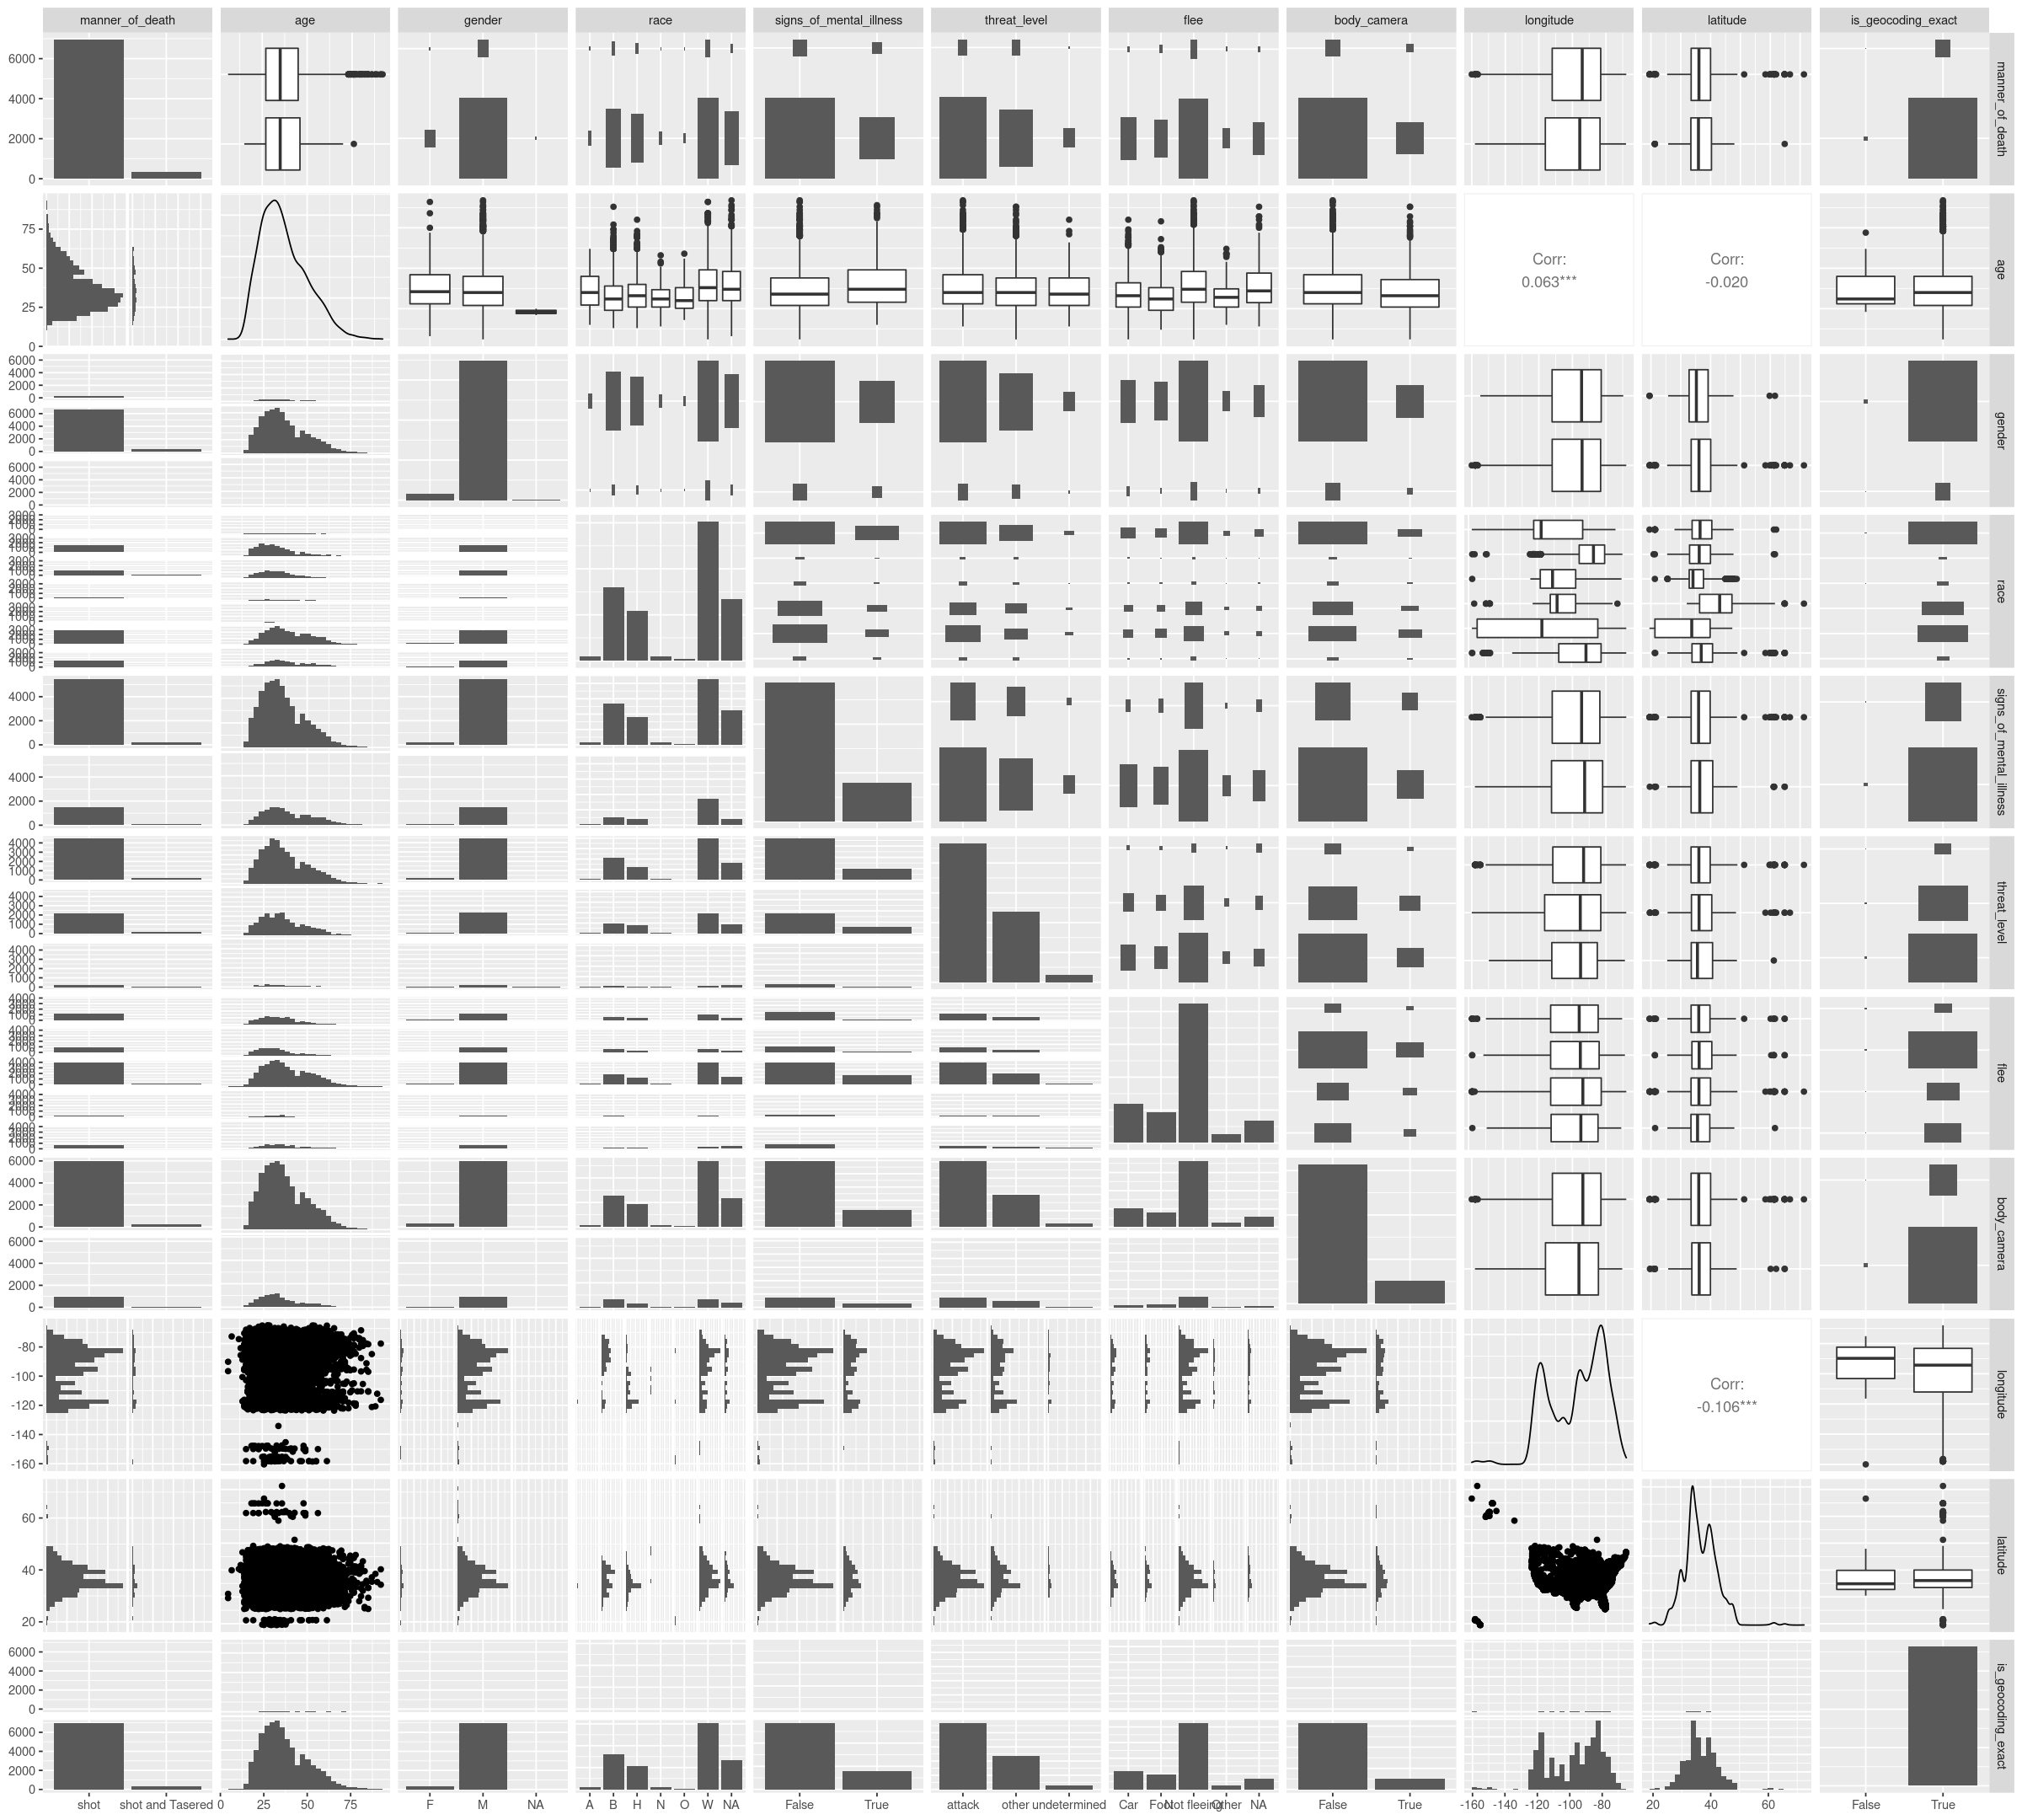

In [130]:
options(repr.plot.width=20, repr.plot.height=18)
ggpairs(data[,!(names(data) %in% c("date", "armed", "state"))])

### Missingness patterns

Check missing data frequency for each column

In [131]:
# Percent missing values per column
as.data.frame((colMeans(is.na(data)))*100)

,(colMeans(is.na(data))) * 100
,<dbl>
date,0.0000000
manner_of_death,0.0000000
armed,2.8665478
age,5.7742422
gender,0.1371554
race,18.3925387
state,0.0000000
signs_of_mental_illness,0.0000000
threat_level,0.0000000


Check patterns in data missingness

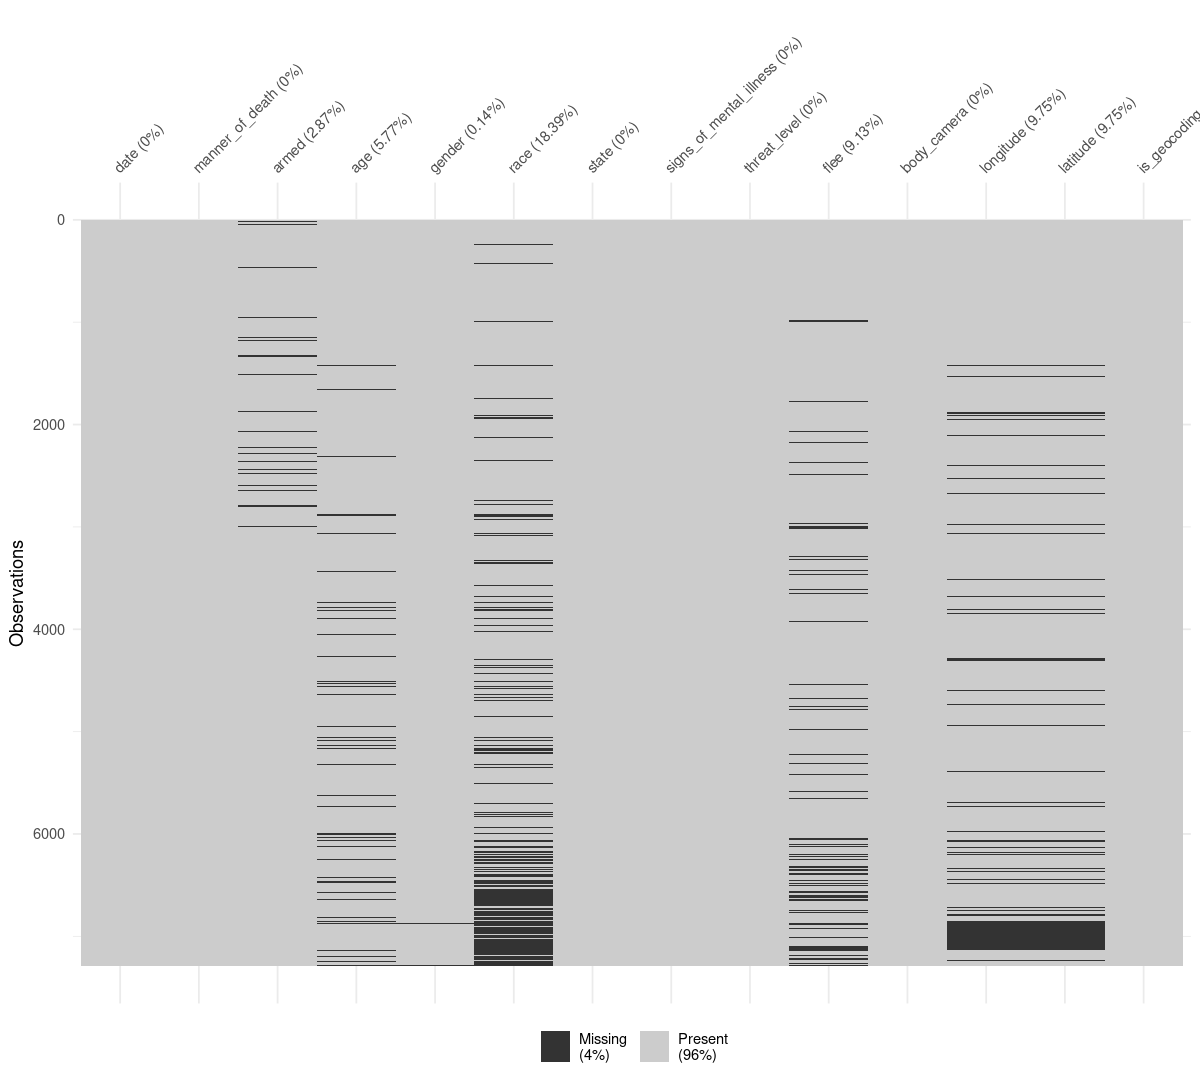

In [135]:
options(repr.plot.width=10, repr.plot.height=9)
vis_miss(data)

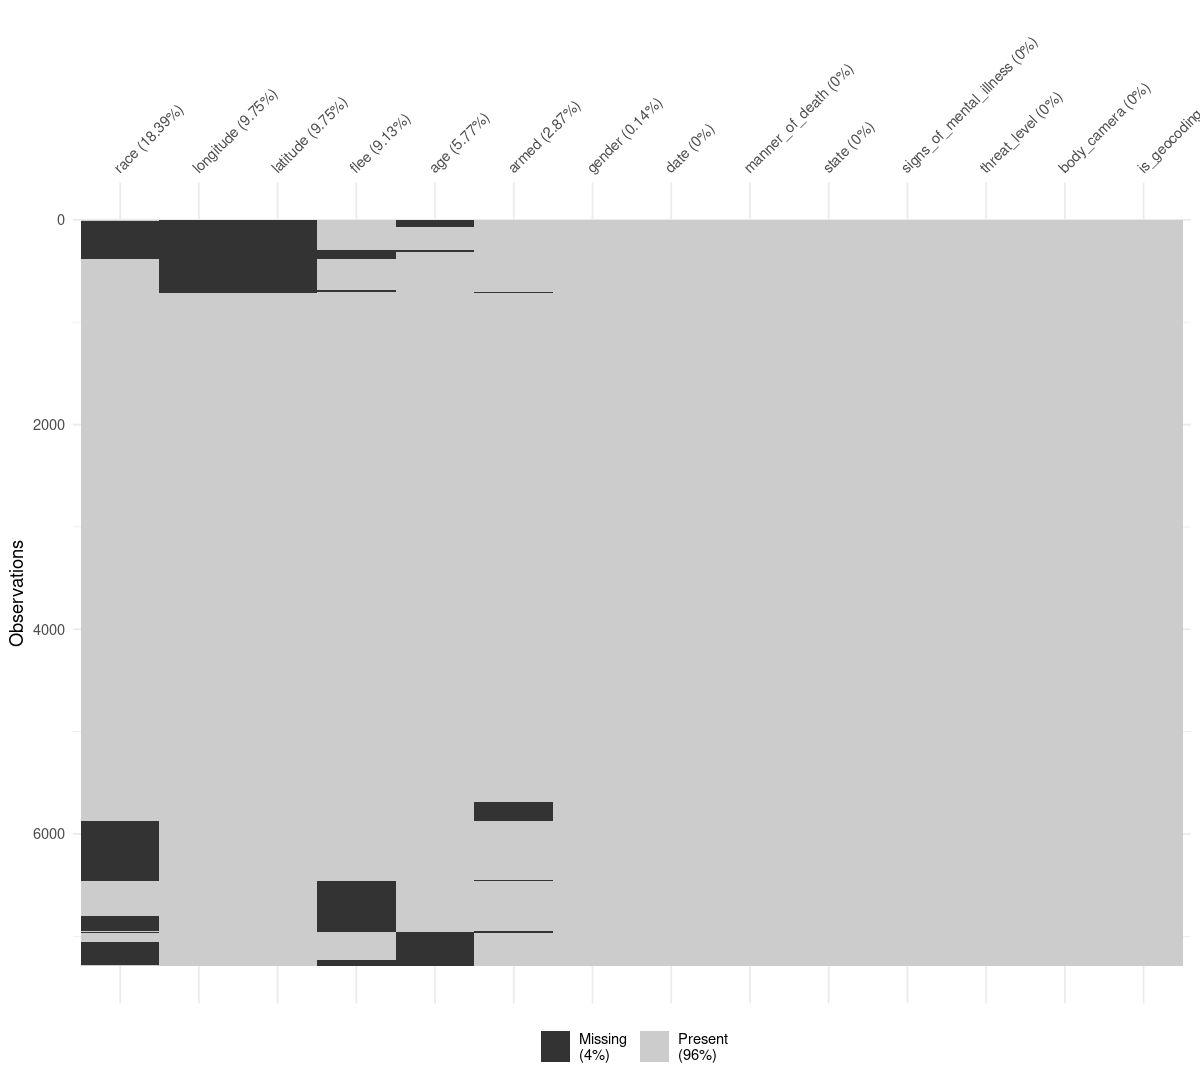

In [136]:
vis_miss(data, cluster = TRUE, sort_miss = TRUE)

### General qns about data

"shot and Tasered" has 339 entries vs "shot" which has 6952 entries

Tranform the "armed" feature into Unarmed/gun/knife/vehicle/other? There are too many different values at the moment

What are the dimensions along which we should consider random effects/random slopes?

Fit splines for anything?

How will we split the data? 